# Social Data Science - Assignment 1 

This **Home Assignment** is **madatory**, it is largerly about regression. In the first task we cover simple 2D regression without knowing the shape of the underlying function. In the second task we are dealing with actual data and try to predict house prices.

You can expect pandas, numpy, sklearn and statsmodels to be installed.

## Formalities
**Submit in a group of 3-4 people until 16.11.2022 23:59CET. The deadline is strict!**

## Evaluation and Grading
General advice for programming excercises at *CSSH*:
Evaluation of your submission is done semi-automatically. Think of it as this notebook being 
executed once. Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only!
* Use external libraries only when specified by task.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature of e.g. a function usually can be inferred from task description, 
  code skeletons and test cases.
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
* Keep your code idempotent! Running it or parts of it multiple times must not yield different
  results. Minimize usage of global variables.
* Ensure your code / notebook terminates in reasonable time.

**There's a story behind each of these points! Don't expect us to fix your stuff!**

Regarding the scores, you will get no points for a task if:
- your function throws an unexpected error (e.g. takes the wrong number of arguments)
- gets stuck in an infinite loop
- takes much much longer than expected (e.g. >1s to compute the mean of two numbers)
- does not produce the desired output (e.g. returns an descendingly sorted list even though we asked for ascending, returns the mean and the std even though we asked for only the mean, prints an output instead of returning it!)

In [2]:
# credentials of all team members (you may add or remove members from the list)
team_members = [
    {
        'first_name': 'Timothy',
        'last_name': 'Borrell',
        'student_id': 436940
    },
    {
        'first_name': 'Bob',
        'last_name': 'Bar',
        'student_id': 54321
    },
    {
        'first_name': 'Not',
        'last_name': 'Sure',
        'student_id': 15432
    }
]

In [3]:
from typing import List, Union
from numbers import Number
from unittest import TestCase
some_testCase = TestCase()

# General remarks


- Python has weak scoping, be careful not to use variables from outside instead of those defined in the functions
- You are welcome to add additional usecases to test your function
- Try to keep your code as deterministic as possible

# 1) A parabola with gaussian noise? (14 points total)

Your measuring device has provided you with the following data `parabola.csv`. 

You have reason to believe that what you are seeing here is a parabola with additional gaussian noise.

So your model is of the form $f(x) = a x^2 + b x + c + \epsilon $, $\epsilon$ describes an error term, $a$, $b$ and $c$ are parameters to be determined.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## a) The data (3 points)

Implement a function `read_data()`, which reads a .csv file structured like `parabola.csv` into a DataFrame. It should return the x values as first and the f(x) values as second return value (both as numpy arrays). Then read the data from the file `parabola.csv` (using `read_data()`) and plot it here in the notebook as a scatterplot. Overlay it with a plot of a parabola. Therefore find a good guess for the parameter $a$, $b$ and $c$ (`a_guess`, `b_guess`, `c_guess`) such that the parabola well approximates the data. (Just guess, do not use fit here).

Give the plot appropriate axis labels and a legend that indicates your guessed values. Save the plot as `'plot_a.png'`.

In [5]:
from pathlib import Path
import pandas as pd

In [6]:
a_guess = float(-1.)
b_guess = float(1.)
c_guess = float(-0.5)

label_parabola = f"{a_guess:.2} x^2 + {b_guess:.2} x + {c_guess}"

In [7]:
def read_data(path : Path) -> (np.array, np.array):
    df = pd.read_csv(path)
    x = np.array(df.iloc[:, 0])
    y = np.array(df.iloc[:, 1])
    return x, y
    #return np.array(x), np.array(y)

In [8]:
x, y = read_data(Path("./parabola.csv"))

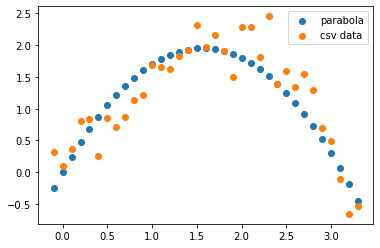

<Figure size 432x288 with 0 Axes>

In [9]:
a = -0.8
b = 2.5
c = 0  
y_par = [a*x_i**2 + b*x_i + c for x_i in x]

plt.scatter(x = x, y = y_par, alpha = 1, label = "parabola")
plt.scatter(x = x, y = y, alpha = 1, label = "csv data")
plt.legend()
fig_a = plt.figure()

In [10]:
fig_a.savefig("plot_a.png")

## b) Fitting polynomial of degree 2 (2 points)

Now fit a polynomial of degree 2 as approximation. Use `np.polyfit` to perform the OLS fitting and store the resulting three parameters in the list `params`.

Because the resulting parameters of the polyfit are hard to interpret we are looking to bring the estimated parameters into another form.

Thus write a function `to_vertex_form()`, which takes as input the result of the polyfit of the form $a x^2 + b x + c$  and converts it into the form $a(x-x_0)^2+d$. Apply your function on the computed `params` and store the resulting parameters in `a`, `x0` and `d`. 

In [11]:
params = np.polyfit(x, y, 2)

In [12]:
def to_vertex_form(params : np.array) -> (float, float, float):
    a = params[0]
    x0 = -params[1]/(2*a)
    d = params[2] - a*x0**2
    return a, x0, d

In [13]:
a, x0, d = to_vertex_form(params)

## c) Plot the resulting fit (2 points)

Plot the data obtained in task 1) and overlay it with the polynomial fit of degree 2 from b).

Give the plot x-labels and y-labels and a legend.
Show the plot here in the notebook and save it as `'plot_c.png'`

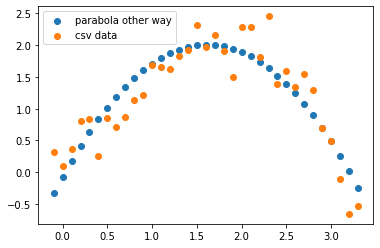

<Figure size 432x288 with 0 Axes>

In [14]:
y_par_2 = [a*(x_i - x0)**2 + d for x_i in x]

plt.scatter(x = x, y = y_par_2, alpha = 1, label = "parabola other way")
plt.scatter(x = x, y = y, alpha = 1, label = "csv data")
plt.legend()
fig_c = plt.figure()

In [15]:
fig_c.savefig("plot_c.png")

## d) Parabola or sine wave? (3 points)

After showing the data to a colleague he suggests that instead of a parabola the data could also originate from a sine wave of the form $2 \sin(x)$.

Assuming the data was indeed generated by a sine wave $2 \sin(x)$ on the given interval, estimate the values of the parabola-parameters $a$, $x_0$ and $d$.

Explain how you obtained your estimated values.
Compare your computed values with the results of the polyfit from b.

2.568533897155572 2.167586582972219


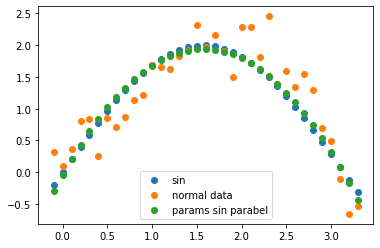

<Figure size 432x288 with 0 Axes>

In [19]:
y_sin = [2*np.sin(x_i) for x_i in x]

params_sin = np.polyfit(x, y_sin, 2)
a, x0, d = to_vertex_form(params_sin)
y_par_3 = [a*(x_i - x0)**2 + d for x_i in x]

err_sin = np.sum([(yi - y_sin) for (yi, y_sin) in zip(y, y_sin)])
err_par = np.sum([(yi - y_par) for (yi, y_par) in zip(y, y_par)])

plt.scatter(x = x, y = y_sin, label ="sin")
plt.scatter(x = x, y= y, label = "normal data")
plt.scatter(x = x, y = y_par_3, label = "params sin parabel")
plt.legend()
fig_d = plt.figure()

your_interpretation = f"""
The values obtained from 1b were x0={x0:.3}, a={a:.3}, d={d:.3}
My Interpretation for sine wave 2sin(x):
We expect a value of x0={1.2:.3} because the top of the sine curve for that intervall is around that point, but it is actually at {x0:.3}
We expect a value of a={3.4:.3} because ...
We expect a value of d={4.5:.3} because ...
We can also observe, that the total error for both approaches in that intervall are {err_sin:.3} for the sinus approach and {err_par:.3} for the parabola approach making it more fitting to represent the data.
"""

In [20]:
print(your_interpretation)


The values obtained from 1b were x0=1.57, a=-0.799, d=1.94
My Interpretation for sine wave 2sin(x):
We expect a value of x0=1.2 because the top of the sine curve for that intervall is around that point, but it is actually at 1.57
We expect a value of a=3.4 because ...
We expect a value of d=4.5 because ...
We can also observe, that the total error for both approaches in that intervall are 2.57 for the sinus approach and 2.17 for the parabola approach making it more fitting to represent the data.



## e) Validating your assumptions with residuals(1 point)

Our model assumption from b) is, that the signal is a parabola. To better understand how well our function approximates the given data we take a look at the residuals.

The residual plot of a function fit is a scatter plot of  $(x_i, y_i - \hat f(x_i))$. $\hat f$ is the estimated shape of our curve (a polynomial of degree two in our case) and $(x_i, y_i)$ are the datapoints the function was fitted to.


If our fitted function well approximates the data all that should be visible in the residuals is that the y values are fluctuating randomly around 0 **independently** of the x values.

Your task is to create the residual plot. GIve the plot appropriate labels and save it as `'plot_res.png'`.

18


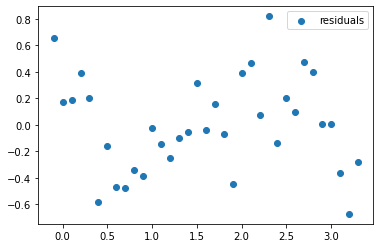

<Figure size 432x288 with 0 Axes>

In [68]:
y_par = [params[0]*x_i**2 + params[1]*x_i + params[2] for x_i in x]
residuals = [(y_i - fx_i) for (y_i, fx_i) in zip(y, y_par)]

print(len([res for res in residuals if res <= 0]))
plt.scatter(x = x, y = residuals, label = "residuals")
plt.legend()

fig_res = plt.figure()

In [46]:
fig_res.savefig("plot_res.png")

## f) Independent of x values? (3 points)
In the plot of the residuals you should see that the there are 11 consecutive points all below zero. You want to evaluate the hypothesis that this is just caused by random chance.

Estimate the chance (probability) of observing 11 consecutive y-values (residual y values) all below 0 under the assumption that the y-values are distributed as independent random gaussian noise with zero mean! Explain your approach and interpret your findings!

In [40]:
mu, sigma = 0, [1, 2, 5, 10, 100, 1000]

for elem in sigma:
    noise = np.random.normal(mu, elem, 100000)
    p_smaller_zero = len([val for val in noise if val < 0])/len(noise)

    p_11_smaller_than_zero = (p_smaller_zero)**11
    print(p_11_smaller_than_zero)
our_chance=f"""
We estimate the chance of this happening for random gaussian noise to be approximately XXX
We computed this value the following way:

We create random noise and compute the probability for a value to be beneath 0. We then take that probability and compute the chance of 11 values being consecutively below 0.

Our interpretation of our result is:

The result is for the calculation is around 0.05% which makes this highly unprobable. This leads to the conclusion that that is caused by random chance.

"""

0.0
0.0005027599023748477
0.0005061902211021948
0.00047796181539712623
0.0004706384038208463
0.0005013276816140056


In [36]:
print(our_chance)


We estimate the chance of this happening for random gaussian noise to be approximately XXX
We computed this value the following way:

We create random noise and compute the probability for a value to be beneath 0. We then take that probability and compute the chance of 11 values being consecutively below 0.

Our interpretation of our result is:

The result is for the calculation is around 0.05% which makes this highly unprobable.




# 2) House price regression (11 points total)

In this task we are interested in predicting the Price of houses from other attributes of those houses.

We use the Melbournce house price dataset: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

In [47]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import statsmodels.api as sm

## a) Load the data (2 points)

Write a function `load_data` that loads the Melbourne data. Assume the data is located in the indicated folder and called `'melb_data.csv'`.

- It discards extremely small ($\leq 10$) and large houses ($\geq 1500$) determined by the `'BuildingArea'`.
- and drops the columns `['Address', "Lattitude", "Longtitude"]`.
- It converts the `'Date'` column into a `'Days'` column, which measures the number of days from the start of first dataset.
- It discard rows that contain non numeric (nan) values. 
- It returns the resulting DataFrame.

In [106]:
def load_data(folder : Path) -> pd.DataFrame:
    df = pd.read_csv(folder)

    discard_values = df[(df["BuildingArea"] >= 1500) | (df["BuildingArea"] <= 10)]
    df = df.drop(discard_values.index)

    drop_columns = ['Address', 'Lattitude', 'Longtitude']
    df = df.drop(columns = drop_columns)
    
    pd.to_datetime(df["Date"], format="%d/%m/%Y")

    df = df.dropna()
    print(len(df))
    # How to convert to DateTime
    # pd.to_datetime(df["Date"], format="%d/%m/%Y")
    return df

In [107]:
df_melb = load_data(Path("melb_data.csv"))
print(len(df_melb)) # 6159
print(df_melb.columns)
#['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 
# 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
# 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname','Propertycount', 'Days']

6159
6159
Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')


In [41]:
df_melb.Days.head()
# 1      0
# 2    394
# 4    121
# 6     93
# 7    247
# Name: Days, dtype: int64

1      0
2    394
4    121
6     93
7    247
Name: Days, dtype: int64

## b) Unique identifiers (2 points)

When doing regression it is usually bad practice if a column is a unique identifier. E.g. in the house pricing dataset there are some sellers that have sold only one house. Thus that datapoint can be uniquely explained with that particular seller.

To avoid this problem you should code a function `drop_almost_unique()` which merges values of a column by replacing entries fewer than min_count with the entry `"other"`.

In [42]:
df_melb["SellerG"].value_counts()

Nelson           762
Jellis           633
hockingstuart    533
Barry            402
Marshall         312
                ... 
Upper              1
Ross               1
Redina             1
Homes              1
Crane              1
Name: SellerG, Length: 202, dtype: int64

In [43]:
def drop_almost_unique(df: pd.DataFrame, column : str, min_count : int) -> pd.DataFrame:
    # df should be left unchanged! 
    return df.copy()

In [45]:

df_dropped = drop_almost_unique(df_melb, "SellerG", 5)
print(df_dropped["SellerG"].value_counts())

#Nelson           762
#Jellis           633
#hockingstuart    533
#Barry            402
#Marshall         312
#                ... 
#W.B.               5
#iTRAK              5
#iSell              5
#Jason              5
#Trimson            5
#Name: SellerG, Length: 87, dtype: int64

print()
print(df_dropped["SellerG"].value_counts()["other"])
# 198

Nelson           762
Jellis           633
hockingstuart    533
Barry            402
Marshall         312
                ... 
W.B.               5
iTRAK              5
Jason              5
Trimson            5
Paul               5
Name: SellerG, Length: 87, dtype: int64

198


## c) Least squares fitting (3 points)

Use the `statsmodels` library to perform least squares regression on different sets of columns:

- Numeric: `['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Days']`
- Sales: `['Type', 'Method', 'Seller']`
- Suburbs: `['Suburb']`
- All: Numeric + Sales + Suburbs

To prepare the DataFrame for fitting, write a function `prepare_df` that filters the columns of the dataframe to `cols` and the Price column. It further uses `drop_almost_unique` on the `SellerG` and `Suburb` column with the provided `min_count` to make sure that no unique identifiers get through. To prepare the non numeric attributes we are dropping specific columns instead of using `pd.get_dummies` with `drop_first=True` which drops the first colum. The specific entries to drop are indicated in the dictionary (`dummy_drop_dict`) below. Preparation should leave the original input dataframe untouched.

Write a function `perform_fits()` that fits all four of these models to the provided dataset. The function returns the four trained models and a list of mean absolute error (MAE, $\sum_i |y_i - \hat f(x_i)|$) for the particular model (maintain the ordering of the task, i.e. Numeric, Sales, Suburbs, All).




In [46]:
numeric_cols = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Days']
sales_cols = ["Type", "Method", "SellerG"]
suburb_cols = ["Suburb"]
all_cols = numeric_cols + sales_cols + suburb_cols

In [47]:
dummy_drop_dict = {
    "SellerG" : "other",
    "Suburb" : "other",
    "Type" : "h",
    "Method" : "S"
}

In [48]:
from typing import List
from statsmodels.regression.linear_model import RegressionResultsWrapper

def prepare_df(df_in : pd.DataFrame, cols : List[str], min_count : int) -> pd.DataFrame:
    return df_in.copy()


def perform_fits(df_in : pd.DataFrame, min_count : int) -> (List[RegressionResultsWrapper], List[float]):
    models = []
    MAEs = []
    
    return models, MAEs

In [50]:
# example output of prepare_df function

df_tmp = prepare_df(df_melb, sales_cols, min_count=100)
print(df_tmp.columns)
# ['Price', 'Type_t', 'Type_u', 'Method_PI', 'Method_SA', 'Method_SP',
#       'Method_VB', 'SellerG_Barry', 'SellerG_Biggin', 'SellerG_Brad',
#       'SellerG_Buxton', 'SellerG_Fletchers', 'SellerG_Greg', 'SellerG_Jas',
#       'SellerG_Jellis', 'SellerG_Marshall', 'SellerG_Nelson', 'SellerG_Ray',
#       'SellerG_Woodards', 'SellerG_hockingstuart']

# as indicated by the dict: Type_h. Method_S and the Seller_other columns are not present
# And we have ommited many Sellers because of the high min_count
del df_tmp

Index(['Price', 'Type_t', 'Type_u', 'Method_PI', 'Method_SA', 'Method_SP',
       'Method_VB', 'SellerG_Barry', 'SellerG_Biggin', 'SellerG_Brad',
       'SellerG_Buxton', 'SellerG_Fletchers', 'SellerG_Greg', 'SellerG_Jas',
       'SellerG_Jellis', 'SellerG_Marshall', 'SellerG_Nelson', 'SellerG_Ray',
       'SellerG_Woodards', 'SellerG_hockingstuart'],
      dtype='object')


In [51]:
# fit models and compute mean absolute errors for the respective models
(Numeric, Sales, Suburbs, All), MAEs = perform_fits(df_melb, 2)
MAEs #[287421.6719700377, 343449.548408068, 362614.8630186443, 212256.37106900712]

[287421.6719700377, 343449.548408068, 362614.8630186443, 212256.37106900712]

In [52]:
type(Numeric)

statsmodels.regression.linear_model.RegressionResultsWrapper

## d) The results of the Least Squares fit. (4 points)
1) Which of the models (Numeric, Sales, Suburbs, All) performs best as measured in adjusted $R^2$?

2) Which model performs best in terms of Mean absolute error. Interpret mean absolute error for this application.

3) If you want to learn about the house market in Melbourne which model would you prefer? Explain your answer.

In [53]:
interpretation = """
1) R^2:
The model XXXX performs bests in terms of R^2 with a value of XXX.XXX.

2) Mean absolute error:


For predicitng house prices this means ...

3) Interpretation:

...
"""
